Start Fit: a = 1.3399999999999976, b = 21.240000000000006


C:\Users\caspe\AppData\Local\Temp\ipykernel_33316\3124456681.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(t, T, 'k.', label='Temperature Data', color='blue')
C:\Users\caspe\AppData\Local\Temp\ipykernel_33316\3124456681.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, f_fit_start(t, *popt_start), 'r--', label='Fit Start', color='orange')


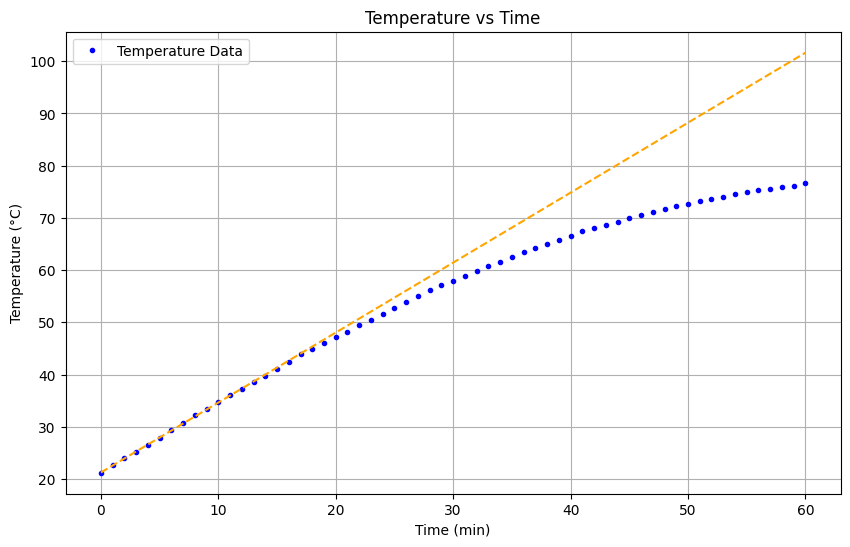

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.loadtxt(r"C:\Users\caspe\Werkruimte\Downloads\tempmetingen-733121424db047611d1756851296ade6.csv", delimiter=";", skiprows=1)

t = data[:, 0]
T = data[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(t, T, 'k.', label='Temperature Data', color='blue')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (°C)')  
plt.title('Temperature vs Time')
plt.legend() 
plt.grid()


def f_fit_start(t,a,b):
    return a*t + b

popt_start, pcov_start = curve_fit(f_fit_start, t[:5], T[:5])
a_start, b_start = popt_start
print(f"Start Fit: a = {a_start}, b = {b_start}")

plt.plot(t, f_fit_start(t, *popt_start), 'r--', label='Fit Start', color='orange')
plt.show()

In [41]:
m_maatbeker = 0.8208 #kg
m_tot_start = 1.2929
m_tot_eind = 1.2749

cv = 4186 #J/kgK

m_water_start = m_tot_start - m_maatbeker
m_water_eind = m_tot_eind - m_maatbeker

P = ( cv * m_water_start * (T[1] - T[0]) ) / (t[1] - t[0])
print(f'het vermogen is {P:.2f} W per minuut')

W = P * len(t)

print(f'totale toegevoegde arbeid is {W:.2f} J')

Q = P * len(t) - (cv * m_water_start * (T[-1] - T[0]))

print(f'totale verloren warmte is {Q:.2f} J')

verdampingswarmte = 2260 * 1e3 # J/kg

verdampingsenergie = abs(m_water_start - m_water_eind) * verdampingswarmte # + 30*cv*abs(m_water_start - m_water_eind)

print(f'de verdampingsenergie van het verdampte' f' water is {verdampingsenergie:.2f} J')


het vermogen is 2766.69 W per minuut
totale toegevoegde arbeid is 168768.39 J
totale verloren warmte is 59286.32 J
de verdampingsenergie van het verdampte water is 40680.00 J


De verdampingsenergie van het verdampte water (40,680 kJ) is niet gelijk aan de totale verloren warmte (59,286 kJ); dit verschil in energie is verloren aan verliezen van warmte aan de omgeving; het experiment zou verbeterd kunnen worden door de bak water beter te isoleren, ook data over de massa per tijdsinterval zou de nauwkeurigheid verhogen, omdat je weet hoe de massa verandert voor de bepaling van de verloren warmte 